<a href="https://colab.research.google.com/github/PhaniChandraSekhar/AIML_Practice/blob/main/AIML_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine (SVM) - Cancer Classification**

**Category:** Supervised Learning (Classification)

**Description:**
Finds the optimal hyperplane that maximizes the margin between classes.

**Key Components:**
- Kernel Functions: Linear, RBF, Polynomial
- Loss Function: Hinge Loss
- Support Vectors: Points closest to decision boundary

**Example Application:**

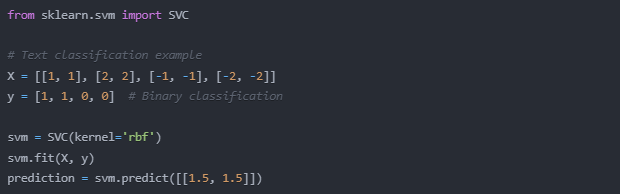


**Best Used For:**
- Text classification
- Image classification
- Bioinformatics
- Hand-written digit recognition


**Code timplementation steps:**
**Data Analysis:**

Exploratory Data Analysis (EDA)
Feature correlation analysis
PCA visualization
Feature distribution analysis


**Model Implementation:**

Multiple kernel functions (linear, RBF, polynomial)
Hyperparameter tuning with GridSearchCV
Cross-validation
Decision boundary visualization


**Evaluation Metrics:**

Classification reports for each kernel
Confusion matrices
ROC curves and AUC scores
Cross-validation scores


**Visualizations:**

Decision boundaries
Feature distributions
Correlation heatmaps
ROC curves
PCA visualization



**Futurer improvements to do:**

1. Add more kernel functions?
2. Include feature selection techniques?
3. Add more visualization types?
4. Implement different preprocessing strategies?
5. Add more detailed parameter tuning analysis?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
class SVMClassifier:
    def __init__(self):
        """Initialize SVM Classifier"""
        self.df = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.best_params = None
        self.kernels = ['linear', 'rbf', 'poly']
        self.predictions = {}
        self.scores = {}

    def load_data(self):
        """Load Breast Cancer Dataset"""
        # Load dataset
        data = load_breast_cancer()
        self.df = pd.DataFrame(data.data, columns=data.feature_names)
        self.df['target'] = data.target

        print("Dataset Shape:", self.df.shape)
        print("\nFeature Names:", data.feature_names.tolist())
        print("\nTarget Names:", data.target_names.tolist())

        return self.df

    def explore_data(self):
        """Perform exploratory data analysis"""

        # 1. Target Distribution
        plt.figure(figsize=(8, 5))
        sns.countplot(data=self.df, x='target')
        plt.title('Distribution of Cancer Diagnosis')
        plt.xlabel('Diagnosis (0: Malignant, 1: Benign)')
        plt.show()

        # 2. Correlation Matrix
        plt.figure(figsize=(15, 12))
        sns.heatmap(self.df.corr(), annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.show()

        # 3. Feature Distributions by Target
        features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
        plt.figure(figsize=(15, 10))
        for i, feature in enumerate(features, 1):
            plt.subplot(2, 2, i)
            sns.boxplot(data=self.df, x='target', y=feature)
            plt.title(f'{feature} by Diagnosis')
        plt.tight_layout()
        plt.show()

        # 4. PCA Visualization
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(StandardScaler().fit_transform(self.df.drop('target', axis=1)))

        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=self.df['target'],
                            cmap='viridis', alpha=0.6)
        plt.colorbar(scatter)
        plt.title('PCA Visualization of Features')
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.show()

        # 5. Feature Pair Plots
        selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
        sns.pairplot(self.df[selected_features + ['target']], hue='target',
                    diag_kind='kde', plot_kws={'alpha': 0.6})
        plt.show()

    def preprocess_data(self):
        """Preprocess the data for modeling"""
        # Separate features and target
        self.X = self.df.drop('target', axis=1)
        self.y = self.df['target']

        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        # Scale features
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)

        return self.X_train, self.X_test, self.y_train, self.y_test

    def train_model(self):
        """Train SVM models with different kernels and hyperparameter tuning"""
        for kernel in self.kernels:
            print(f"\nTraining SVM with {kernel} kernel...")

            # Define parameter grid
            if kernel == 'linear':
                param_grid = {
                    'C': [0.1, 1, 10, 100]
                }
            else:
                param_grid = {
                    'C': [0.1, 1, 10, 100],
                    'gamma': ['scale', 'auto', 0.1, 0.01]
                }

            # Initialize model
            svm = SVC(kernel=kernel, random_state=42, probability=True)

            # Perform GridSearchCV
            grid_search = GridSearchCV(
                estimator=svm,
                param_grid=param_grid,
                cv=5,
                n_jobs=-1,
                verbose=0
            )

            # Fit the model
            grid_search.fit(self.X_train, self.y_train)

            # Store results
            self.predictions[kernel] = grid_search.predict(self.X_test)
            self.scores[kernel] = {
                'best_params': grid_search.best_params_,
                'best_score': grid_search.best_score_,
                'model': grid_search.best_estimator_
            }

            print(f"Best parameters: {grid_search.best_params_}")
            print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    def evaluate_models(self):
        """Evaluate and compare different kernel performances"""

        # 1. Classification Reports
        for kernel in self.kernels:
            print(f"\nClassification Report for {kernel} kernel:")
            print(classification_report(self.y_test, self.predictions[kernel]))

        # 2. Confusion Matrices
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        for i, kernel in enumerate(self.kernels):
            cm = confusion_matrix(self.y_test, self.predictions[kernel])
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Confusion Matrix - {kernel} kernel')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('Actual')
        plt.tight_layout()
        plt.show()

        # 3. ROC Curves
        plt.figure(figsize=(10, 8))
        for kernel in self.kernels:
            y_pred_proba = self.scores[kernel]['model'].predict_proba(self.X_test)[:, 1]
            fpr, tpr, _ = roc_curve(self.y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, label=f'{kernel} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves for Different Kernels')
        plt.legend()
        plt.show()

    def visualize_decision_boundaries(self):
        """Visualize decision boundaries using PCA"""
        # Reduce dimensions to 2D using PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(self.X)

        # Split and scale the PCA data
        X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
            X_pca, self.y, test_size=0.2, random_state=42
        )

        # Create mesh grid
        x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
        y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                            np.arange(y_min, y_max, 0.02))

        # Plot decision boundaries for each kernel
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        for i, kernel in enumerate(self.kernels):
            # Train SVM with best parameters
            svm = SVC(kernel=kernel, **self.scores[kernel]['best_params'])
            svm.fit(X_train_pca, y_train_pca)

            # Plot decision boundary
            Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            axes[i].contourf(xx, yy, Z, alpha=0.4)
            axes[i].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca,
                          alpha=0.8)
            axes[i].set_title(f'Decision Boundary - {kernel} kernel')

        plt.tight_layout()
        plt.show()

    def predict_new_data(self, new_data):
        """Make predictions using all kernel models"""
        if isinstance(new_data, dict):
            new_data = pd.DataFrame([new_data])

        # Scale the data
        scaler = StandardScaler()
        new_data_scaled = scaler.fit_transform(new_data)

        # Make predictions with all kernels
        results = {}
        for kernel in self.kernels:
            model = self.scores[kernel]['model']
            prediction = model.predict(new_data_scaled)
            probability = model.predict_proba(new_data_scaled)

            results[kernel] = {
                'prediction': prediction[0],
                'probability': probability[0][1]
            }

        return results

Step 1: Loading data...
Dataset Shape: (569, 31)

Feature Names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

Target Names: ['malignant', 'benign']

Step 2: Exploring data...


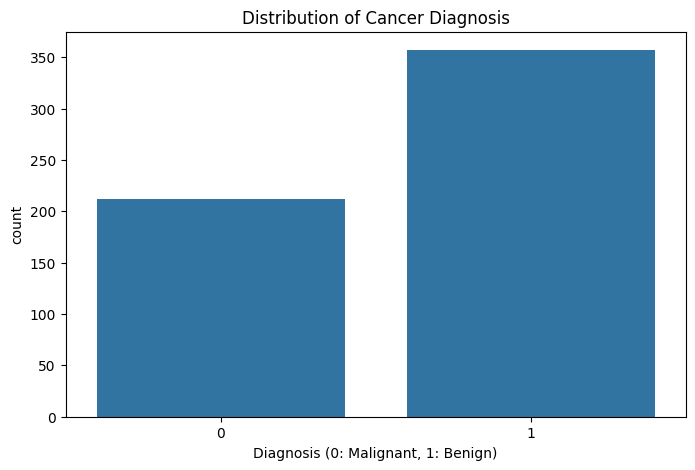

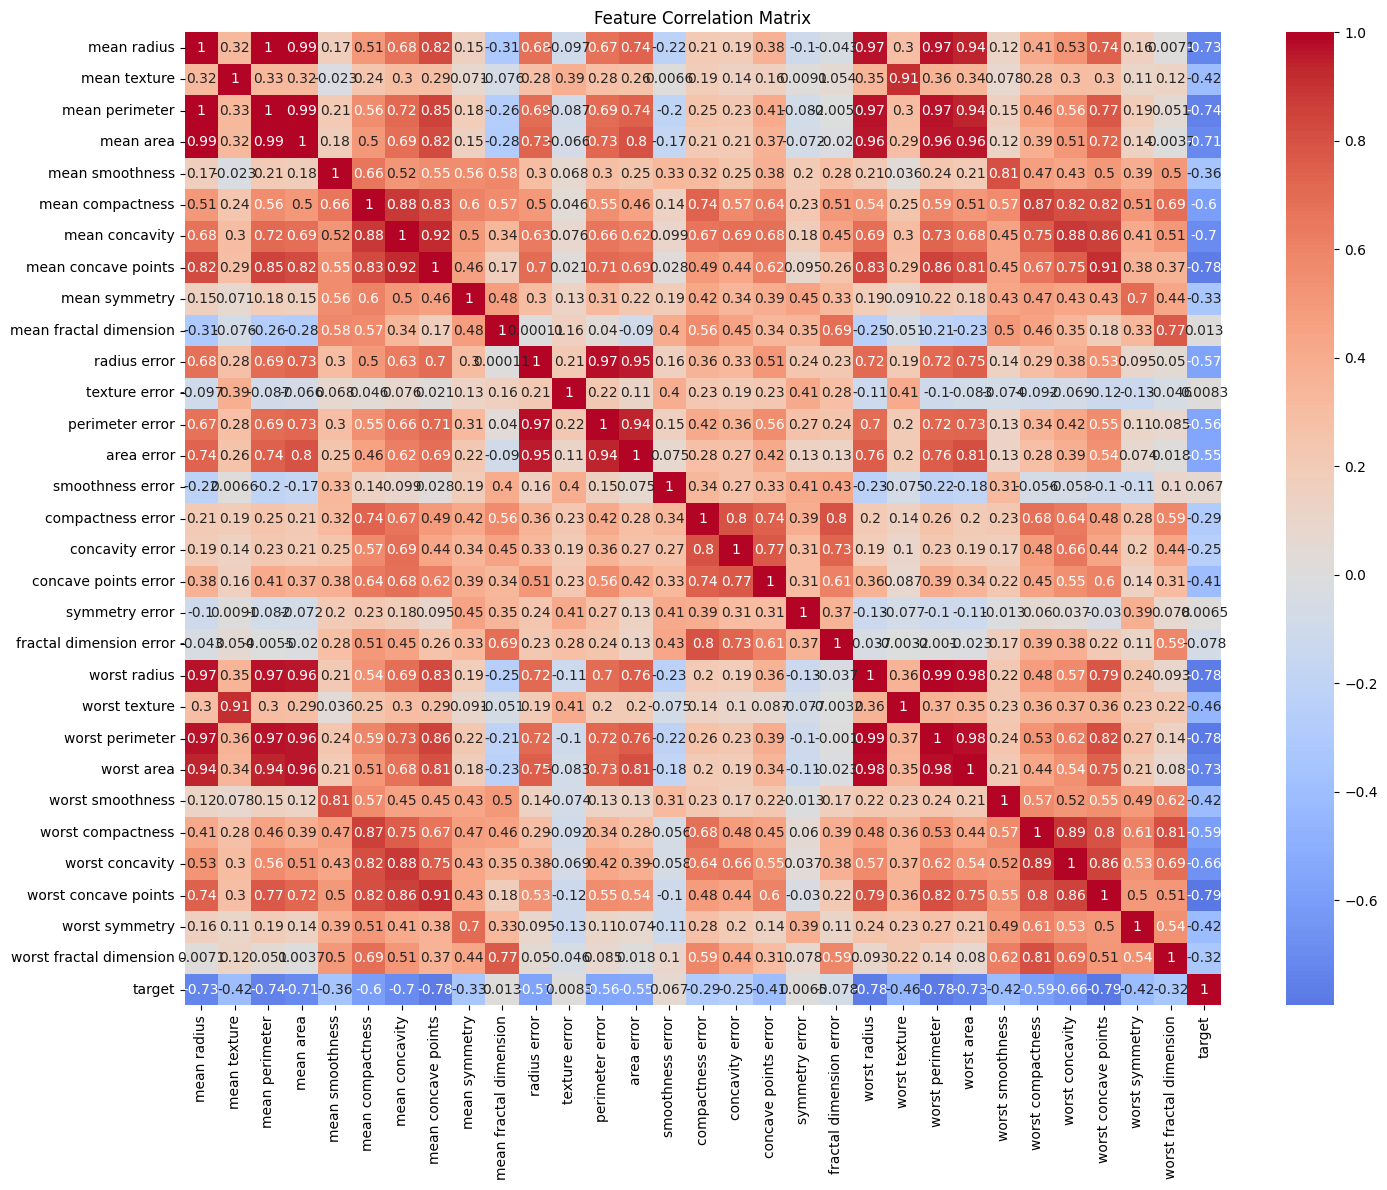

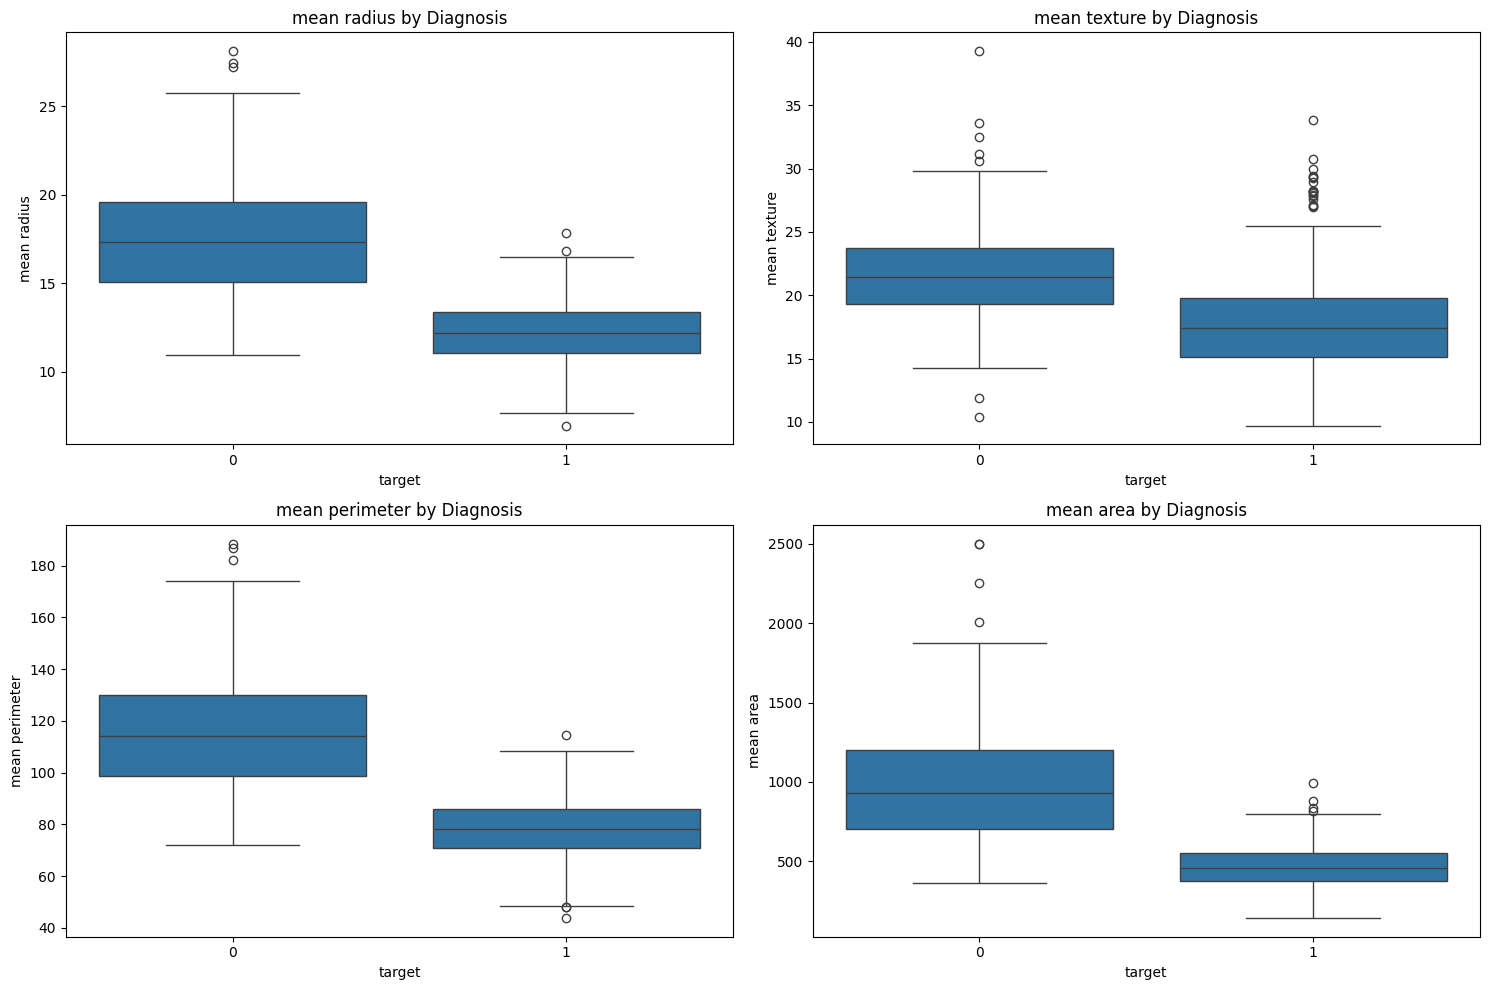

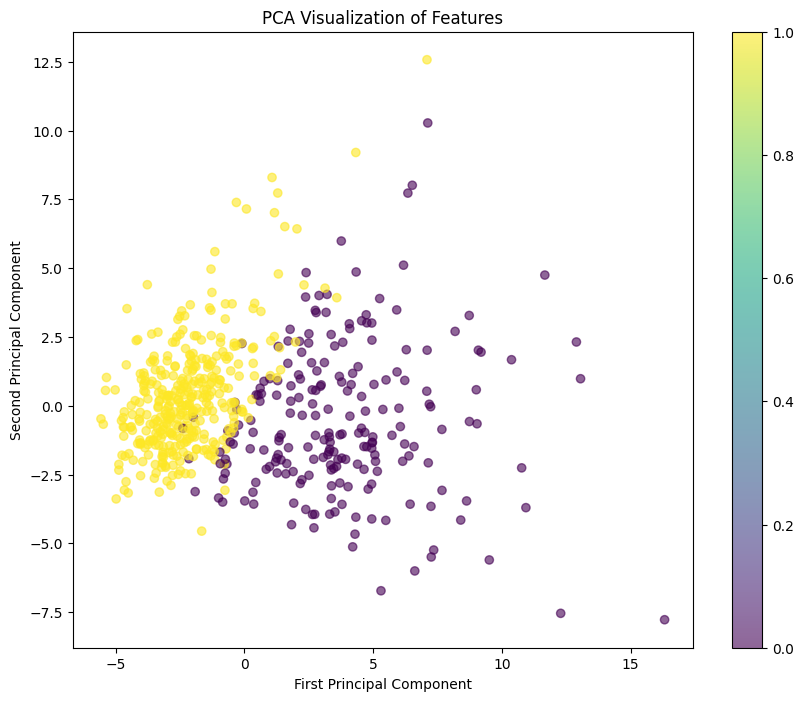

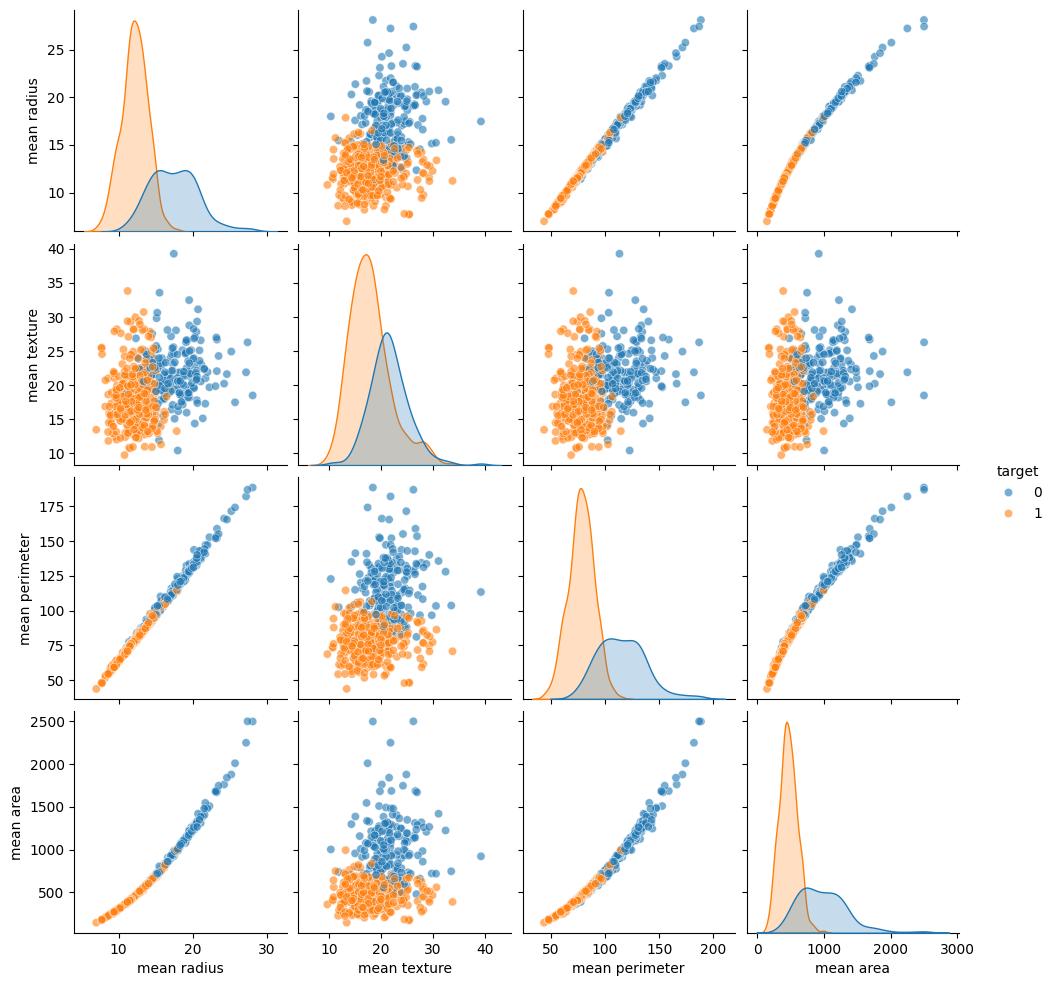


Step 3: Preprocessing data...

Step 4: Training models...

Training SVM with linear kernel...
Best parameters: {'C': 0.1}
Best cross-validation score: 0.9736

Training SVM with rbf kernel...
Best parameters: {'C': 1, 'gamma': 'scale'}
Best cross-validation score: 0.9758

Training SVM with poly kernel...
Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.9582

Step 5: Evaluating models...

Classification Report for linear kernel:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Classification Report for rbf kernel:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy   

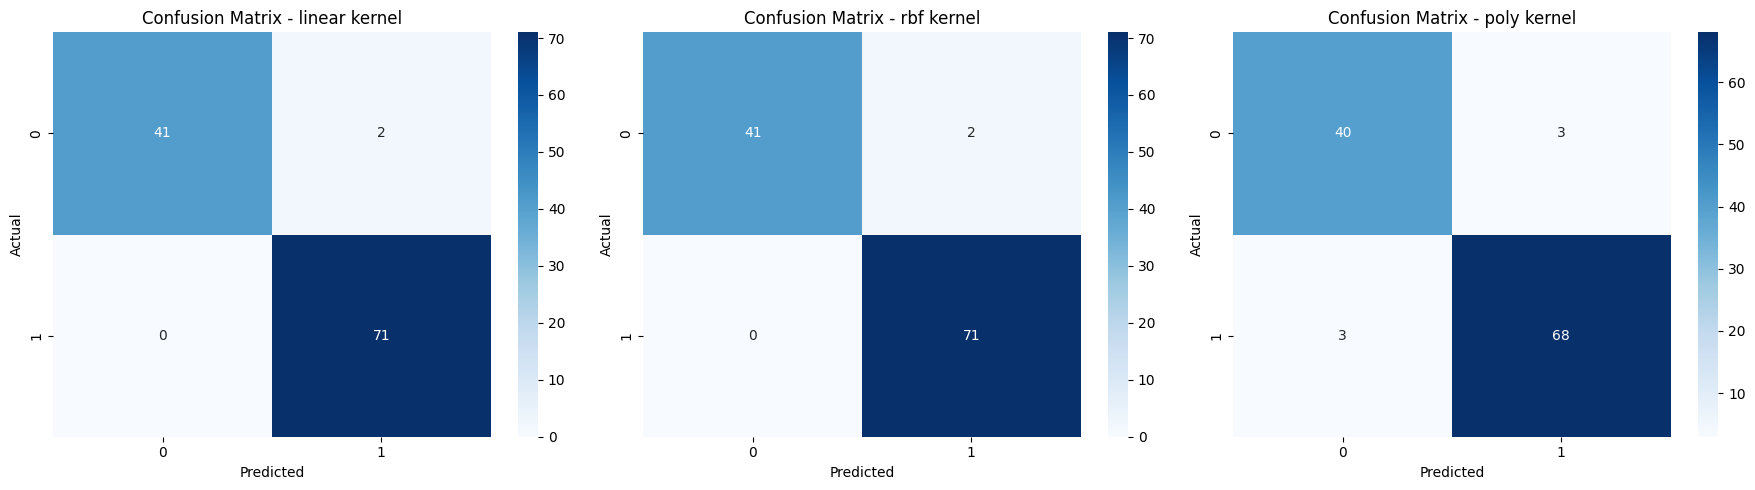

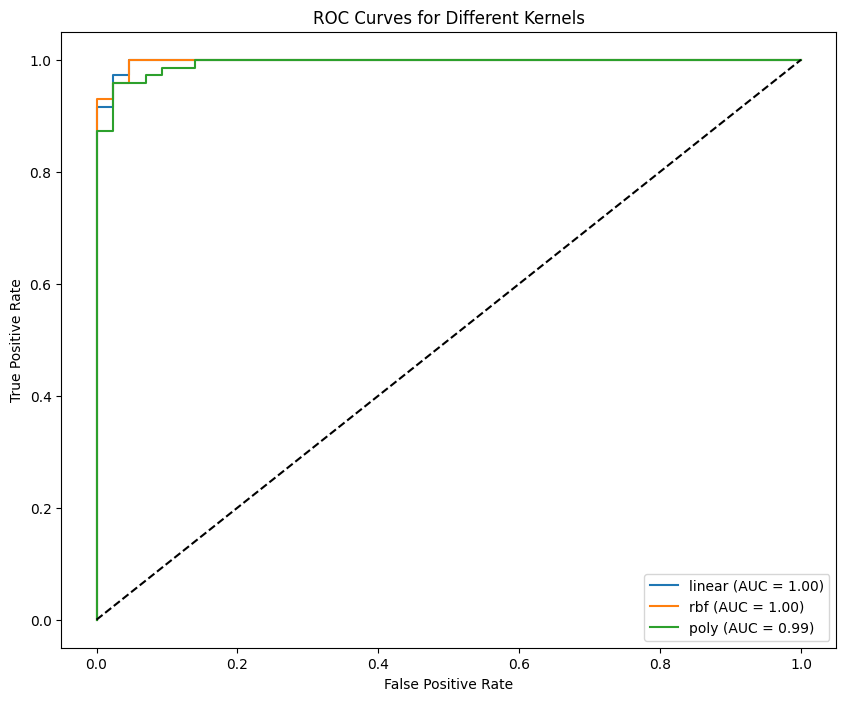


Step 6: Visualizing decision boundaries...


In [ ]:
def main():
    # Create instance of SVMClassifier
    classifier = SVMClassifier()

    # Step 1: Load data
    print("Step 1: Loading data...")
    classifier.load_data()

    # Step 2: Explore data
    print("\nStep 2: Exploring data...")
    classifier.explore_data()

    # Step 3: Preprocess data
    print("\nStep 3: Preprocessing data...")
    classifier.preprocess_data()

    # Step 4: Train models
    print("\nStep 4: Training models...")
    classifier.train_model()

    # Step 5: Evaluate models
    print("\nStep 5: Evaluating models...")
    classifier.evaluate_models()

    # Step 6: Visualize decision boundaries
    print("\nStep 6: Visualizing decision boundaries...")
    classifier.visualize_decision_boundaries()

    # Example prediction
    print("\nStep 7: Example prediction...")
    # Sample data (mean values of features)
    sample_data = classifier.df.drop('target', axis=1).mean().to_dict()

    results = classifier.predict_new_data(sample_data)
    print("\nPredictions for sample data:")
    for kernel, result in results.items():
        print(f"\n{kernel} kernel:")
        print(f"Diagnosis: {'Benign' if result['prediction'] == 1 else 'Malignant'}")
        print(f"Probability of being benign: {result['probability']:.2f}")

if __name__ == "__main__":
    main()